In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']

X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

1797 (8, 8)
[0 1 2 3 4]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=(10, 10), 
                     n_layers=5,
                     n_classes=10,
                     activation_func=lambda x: torch.softmax(x, dim=0),
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 78.1 ms, sys: 15.6 ms, total: 93.8 ms
Wall time: 80.8 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=32, n_epochs=1000)

Epoch 1 of 1000 - train_loss: 2.3010 - train_acc: 0.1724 - val_loss: 2.3025 - val_acc: 0.1076
Epoch 2 of 1000 - train_loss: 2.3004 - train_acc: 0.1724 - val_loss: 2.3025 - val_acc: 0.1250
Epoch 3 of 1000 - train_loss: 2.2998 - train_acc: 0.1724 - val_loss: 2.3024 - val_acc: 0.1493
Epoch 4 of 1000 - train_loss: 2.2992 - train_acc: 0.2069 - val_loss: 2.3024 - val_acc: 0.1562
Epoch 5 of 1000 - train_loss: 2.2985 - train_acc: 0.2069 - val_loss: 2.3023 - val_acc: 0.1701
Epoch 6 of 1000 - train_loss: 2.2979 - train_acc: 0.2759 - val_loss: 2.3022 - val_acc: 0.2153
Epoch 7 of 1000 - train_loss: 2.2971 - train_acc: 0.3103 - val_loss: 2.3022 - val_acc: 0.2326
Epoch 8 of 1000 - train_loss: 2.2963 - train_acc: 0.3103 - val_loss: 2.3021 - val_acc: 0.2500
Epoch 9 of 1000 - train_loss: 2.2954 - train_acc: 0.4483 - val_loss: 2.3020 - val_acc: 0.2778
Epoch 10 of 1000 - train_loss: 2.2945 - train_acc: 0.4483 - val_loss: 2.3020 - val_acc: 0.2917
Epoch 11 of 1000 - train_loss: 2.2935 - train_acc: 0.4483 -

Epoch 87 of 1000 - train_loss: 2.1430 - train_acc: 0.8276 - val_loss: 2.2888 - val_acc: 0.7743
Epoch 88 of 1000 - train_loss: 2.1425 - train_acc: 0.8276 - val_loss: 2.2887 - val_acc: 0.7743
Epoch 89 of 1000 - train_loss: 2.1421 - train_acc: 0.8276 - val_loss: 2.2887 - val_acc: 0.7812
Epoch 90 of 1000 - train_loss: 2.1416 - train_acc: 0.8276 - val_loss: 2.2886 - val_acc: 0.7812
Epoch 91 of 1000 - train_loss: 2.1411 - train_acc: 0.8276 - val_loss: 2.2885 - val_acc: 0.7812
Epoch 92 of 1000 - train_loss: 2.1405 - train_acc: 0.8276 - val_loss: 2.2884 - val_acc: 0.7882
Epoch 93 of 1000 - train_loss: 2.1399 - train_acc: 0.8276 - val_loss: 2.2883 - val_acc: 0.7847
Epoch 94 of 1000 - train_loss: 2.1393 - train_acc: 0.8276 - val_loss: 2.2882 - val_acc: 0.7882
Epoch 95 of 1000 - train_loss: 2.1386 - train_acc: 0.8276 - val_loss: 2.2882 - val_acc: 0.7847
Epoch 96 of 1000 - train_loss: 2.1379 - train_acc: 0.8276 - val_loss: 2.2881 - val_acc: 0.7847
Epoch 97 of 1000 - train_loss: 2.1373 - train_acc:

Epoch 172 of 1000 - train_loss: 2.0863 - train_acc: 0.8276 - val_loss: 2.2823 - val_acc: 0.8264
Epoch 173 of 1000 - train_loss: 2.0858 - train_acc: 0.8276 - val_loss: 2.2822 - val_acc: 0.8264
Epoch 174 of 1000 - train_loss: 2.0856 - train_acc: 0.8276 - val_loss: 2.2822 - val_acc: 0.8264
Epoch 175 of 1000 - train_loss: 2.0854 - train_acc: 0.8276 - val_loss: 2.2822 - val_acc: 0.8264
Epoch 176 of 1000 - train_loss: 2.0852 - train_acc: 0.8276 - val_loss: 2.2822 - val_acc: 0.8264
Epoch 177 of 1000 - train_loss: 2.0850 - train_acc: 0.8276 - val_loss: 2.2822 - val_acc: 0.8299
Epoch 178 of 1000 - train_loss: 2.0847 - train_acc: 0.8276 - val_loss: 2.2821 - val_acc: 0.8299
Epoch 179 of 1000 - train_loss: 2.0845 - train_acc: 0.8276 - val_loss: 2.2821 - val_acc: 0.8299
Epoch 180 of 1000 - train_loss: 2.0842 - train_acc: 0.8276 - val_loss: 2.2821 - val_acc: 0.8299
Epoch 181 of 1000 - train_loss: 2.0840 - train_acc: 0.8276 - val_loss: 2.2821 - val_acc: 0.8299
Epoch 182 of 1000 - train_loss: 2.0837 -

Epoch 257 of 1000 - train_loss: 2.0668 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 258 of 1000 - train_loss: 2.0668 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 259 of 1000 - train_loss: 2.0667 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 260 of 1000 - train_loss: 2.0667 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 261 of 1000 - train_loss: 2.0666 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 262 of 1000 - train_loss: 2.0665 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 263 of 1000 - train_loss: 2.0665 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8194
Epoch 264 of 1000 - train_loss: 2.0664 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8160
Epoch 265 of 1000 - train_loss: 2.0664 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8160
Epoch 266 of 1000 - train_loss: 2.0663 - train_acc: 0.8621 - val_loss: 2.2804 - val_acc: 0.8160
Epoch 267 of 1000 - train_loss: 2.0663 -

Epoch 342 of 1000 - train_loss: 2.0599 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 343 of 1000 - train_loss: 2.0599 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 344 of 1000 - train_loss: 2.0599 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 345 of 1000 - train_loss: 2.0598 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 346 of 1000 - train_loss: 2.0598 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 347 of 1000 - train_loss: 2.0598 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 348 of 1000 - train_loss: 2.0597 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 349 of 1000 - train_loss: 2.0597 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 350 of 1000 - train_loss: 2.0597 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 351 of 1000 - train_loss: 2.0597 - train_acc: 0.8966 - val_loss: 2.2798 - val_acc: 0.8264
Epoch 352 of 1000 - train_loss: 2.0597 -

Epoch 427 of 1000 - train_loss: 2.0595 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8299
Epoch 428 of 1000 - train_loss: 2.0594 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8299
Epoch 429 of 1000 - train_loss: 2.0594 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8299
Epoch 430 of 1000 - train_loss: 2.0594 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8333
Epoch 431 of 1000 - train_loss: 2.0593 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8333
Epoch 432 of 1000 - train_loss: 2.0593 - train_acc: 0.8966 - val_loss: 2.2797 - val_acc: 0.8333
Epoch 433 of 1000 - train_loss: 2.0592 - train_acc: 0.8966 - val_loss: 2.2796 - val_acc: 0.8333
Epoch 434 of 1000 - train_loss: 2.0592 - train_acc: 0.8966 - val_loss: 2.2796 - val_acc: 0.8333
Epoch 435 of 1000 - train_loss: 2.0591 - train_acc: 0.8966 - val_loss: 2.2796 - val_acc: 0.8333
Epoch 436 of 1000 - train_loss: 2.0591 - train_acc: 0.8966 - val_loss: 2.2796 - val_acc: 0.8333
Epoch 437 of 1000 - train_loss: 2.0590 -

Epoch 512 of 1000 - train_loss: 2.0588 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 513 of 1000 - train_loss: 2.0588 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 514 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 515 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 516 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 517 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 518 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 519 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 520 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 521 of 1000 - train_loss: 2.0587 - train_acc: 0.8966 - val_loss: 2.2795 - val_acc: 0.8368
Epoch 522 of 1000 - train_loss: 2.0587 -

Epoch 597 of 1000 - train_loss: 2.0565 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 598 of 1000 - train_loss: 2.0565 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 599 of 1000 - train_loss: 2.0565 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8368
Epoch 600 of 1000 - train_loss: 2.0564 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 601 of 1000 - train_loss: 2.0564 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 602 of 1000 - train_loss: 2.0563 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 603 of 1000 - train_loss: 2.0563 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 604 of 1000 - train_loss: 2.0563 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 605 of 1000 - train_loss: 2.0562 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 606 of 1000 - train_loss: 2.0562 - train_acc: 0.8966 - val_loss: 2.2792 - val_acc: 0.8403
Epoch 607 of 1000 - train_loss: 2.0562 -

Epoch 682 of 1000 - train_loss: 2.0560 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 683 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 684 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 685 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 686 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 687 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8438
Epoch 688 of 1000 - train_loss: 2.0559 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8403
Epoch 689 of 1000 - train_loss: 2.0558 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8403
Epoch 690 of 1000 - train_loss: 2.0558 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8403
Epoch 691 of 1000 - train_loss: 2.0558 - train_acc: 0.8966 - val_loss: 2.2791 - val_acc: 0.8403
Epoch 692 of 1000 - train_loss: 2.0558 -

Epoch 767 of 1000 - train_loss: 2.0541 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 768 of 1000 - train_loss: 2.0541 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 769 of 1000 - train_loss: 2.0540 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 770 of 1000 - train_loss: 2.0540 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 771 of 1000 - train_loss: 2.0540 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 772 of 1000 - train_loss: 2.0539 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 773 of 1000 - train_loss: 2.0539 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 774 of 1000 - train_loss: 2.0539 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 775 of 1000 - train_loss: 2.0538 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 776 of 1000 - train_loss: 2.0538 - train_acc: 0.8966 - val_loss: 2.2789 - val_acc: 0.8438
Epoch 777 of 1000 - train_loss: 2.0538 -

Epoch 852 of 1000 - train_loss: 2.0520 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 853 of 1000 - train_loss: 2.0520 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 854 of 1000 - train_loss: 2.0519 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 855 of 1000 - train_loss: 2.0519 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 856 of 1000 - train_loss: 2.0519 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 857 of 1000 - train_loss: 2.0519 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 858 of 1000 - train_loss: 2.0518 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 859 of 1000 - train_loss: 2.0518 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 860 of 1000 - train_loss: 2.0518 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 861 of 1000 - train_loss: 2.0518 - train_acc: 0.8966 - val_loss: 2.2787 - val_acc: 0.8576
Epoch 862 of 1000 - train_loss: 2.0517 -

Epoch 937 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 938 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 939 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 940 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 941 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 942 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 943 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 944 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 945 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 946 of 1000 - train_loss: 2.0512 - train_acc: 0.8966 - val_loss: 2.2786 - val_acc: 0.8611
Epoch 947 of 1000 - train_loss: 2.0512 -

In [7]:
clf.score(X_test, y_test)

tensor(0.8611)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95        33
          1       0.71      0.79      0.75        28
          2       0.84      0.82      0.83        33
          3       0.83      0.88      0.86        34
          4       1.00      0.91      0.95        46
          5       0.88      0.74      0.80        47
          6       0.97      0.97      0.97        35
          7       0.79      0.91      0.85        34
          8       0.86      0.83      0.85        30
          9       0.75      0.82      0.79        40

avg / total       0.87      0.86      0.86       360



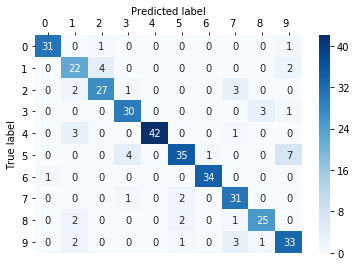

In [9]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

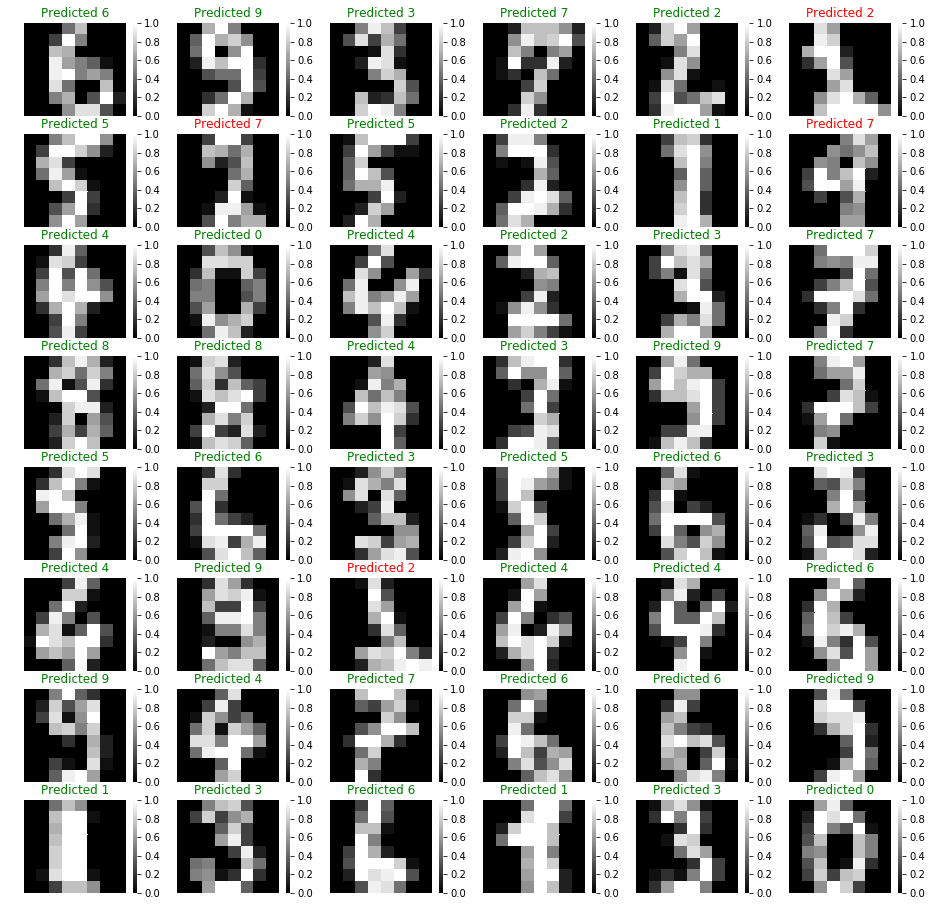

In [10]:
n_rows = 8
n_cols = 6
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2.7
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('Predicted %d' % actual, color=color)

plt.show()

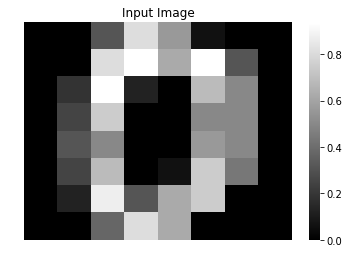

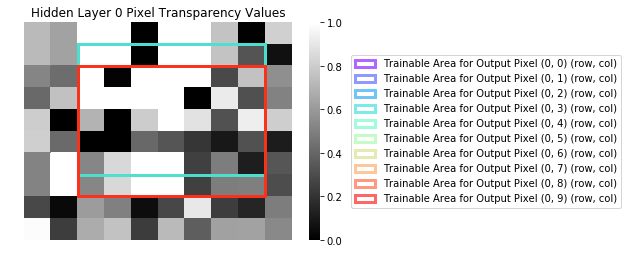

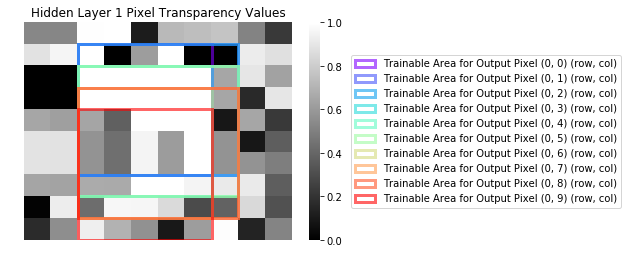

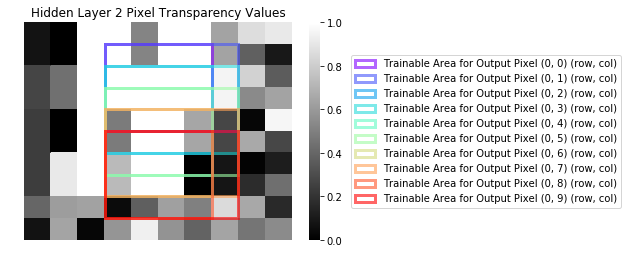

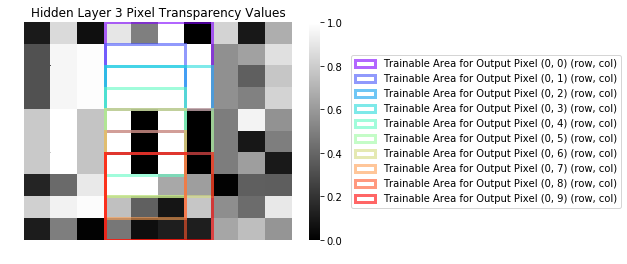

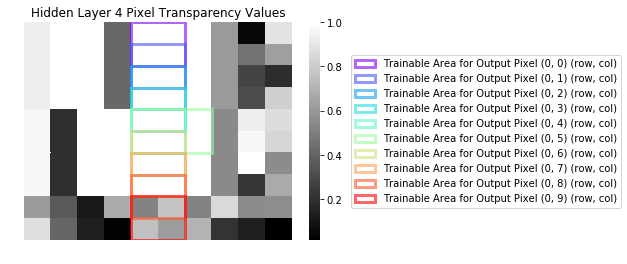

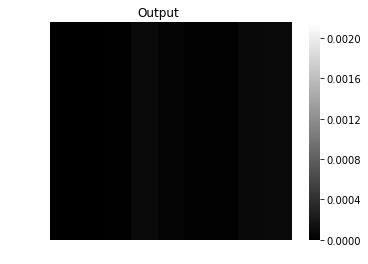

In [11]:
# TODO: Fix this plot.

colors = plt.cm.rainbow(np.linspace(0,1,clf.output_layer.n_rows * clf.output_layer.n_cols))
        
ax = sns.heatmap(X[0], cmap='gray')
ax.set(title='Input Image')
ax.set_axis_off()
plt.show()

for i, layer in enumerate(clf.hidden_layers):              
    ax = sns.heatmap(layer.pixel_values, cmap='gray')
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 1
            width = (max_extent[1] - min_extent[1]) + 1
            
            rect = patches.Rectangle(min_extent, width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel (%d, %d) (row, col)' % (row, col))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % i)
        ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        plt.show()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, cmap='gray')
ax.set(title='Output')
ax.set_axis_off()
plt.show()